<a href="https://colab.research.google.com/github/KevinWashington/SILLM_Atividade_1/blob/main/Atividade_1_Zscore_Binomial_B.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Comando do Problema: Busque um dataset e faça histogramas de duas features para cada classe no dataset. Discuta o contexto sobre o dataset usado, com a explicação sobre ele, suas classes e features.


Introdução: A primeira etapa da atividade envolve a exploração e visualização de um conjunto de dados para entender a distribuição de suas features em relação às suas classes. Para esta análise, utilizei o Iris Dataset, um clássico da estatística, introduzido por Ronald Fisher em 1936.

O objetivo principal é avaliar a separabilidade das classes com base nas features e entender como o parâmetro de bins afeta a visualização da distribuição.

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm

file_path = 'IRIS.csv'
df = pd.read_csv(file_path)

class_column_name = 'species'
print(f"\nContagem de Amostras por Classe ({class_column_name}):")
print(df[class_column_name].value_counts())

FEATURE_1 = 'petal_length'
FEATURE_2 = 'sepal_width'
CLASS_COLUMN = 'species'
classes = df[CLASS_COLUMN].unique()


Contagem de Amostras por Classe (species):
species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64


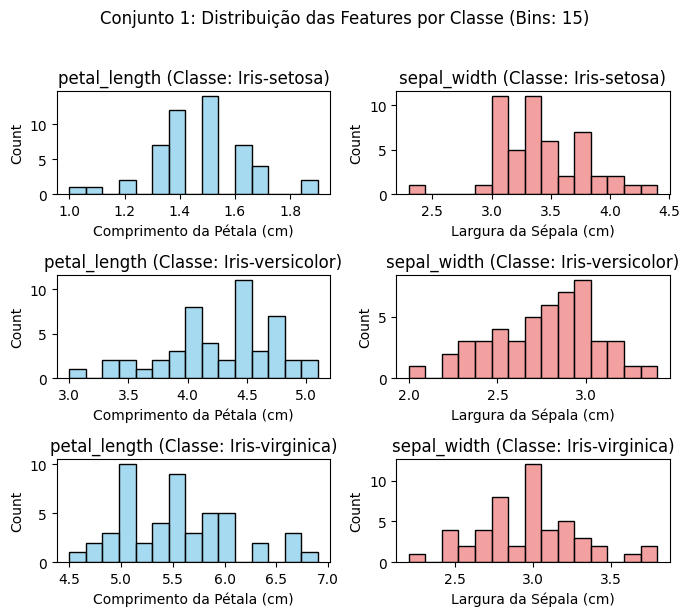

In [ ]:
BINS_1 = 15

fig, axes = plt.subplots(nrows=len(classes), ncols=2, figsize=(7, 6))
fig.suptitle(f'Conjunto 1: Distribuição das Features por Classe (Bins: {BINS_1})', fontsize=12, y=1.02)

for i, class_name in enumerate(classes):
    df_class = df[df[CLASS_COLUMN] == class_name]

    # Feature 1: petal_length
    sns.histplot(df_class[FEATURE_1], bins=BINS_1, ax=axes[i, 0], color='skyblue')
    axes[i, 0].set_title(f'{FEATURE_1} (Classe: {class_name})')
    axes[i, 0].set_xlabel('Comprimento da Pétala (cm)')

    # Feature 2: sepal_width
    sns.histplot(df_class[FEATURE_2], bins=BINS_1, ax=axes[i, 1], color='lightcoral')
    axes[i, 1].set_title(f'{FEATURE_2} (Classe: {class_name})')
    axes[i, 1].set_xlabel('Largura da Sépala (cm)')

plt.tight_layout()
plt.show()

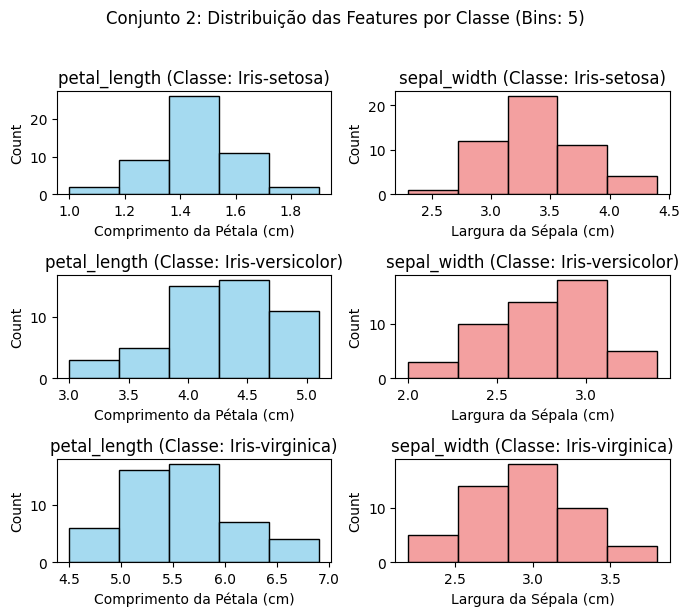

In [ ]:
BINS_2 = 5

fig, axes = plt.subplots(nrows=len(classes), ncols=2, figsize=(7, 6))
fig.suptitle(f'Conjunto 2: Distribuição das Features por Classe (Bins: {BINS_2})', fontsize=12, y=1.02)

for i, class_name in enumerate(classes):
    df_class = df[df[CLASS_COLUMN] == class_name]

    # Feature 1: petal_length
    sns.histplot(df_class[FEATURE_1], bins=BINS_2, ax=axes[i, 0], color='skyblue')
    axes[i, 0].set_title(f'{FEATURE_1} (Classe: {class_name})')
    axes[i, 0].set_xlabel('Comprimento da Pétala (cm)')

    # Feature 2: sepal_width
    sns.histplot(df_class[FEATURE_2], bins=BINS_2, ax=axes[i, 1], color='lightcoral')
    axes[i, 1].set_title(f'{FEATURE_2} (Classe: {class_name})')
    axes[i, 1].set_xlabel('Largura da Sépala (cm)')

plt.tight_layout()
plt.show()

Sobre a feature pental_length, a distribuição da Iris-setosa é quase perfeitamente separada das demais, sem sobreposição significativa. A sobreposição é maior entre Iris-versicolor e Iris-virginica. Logo a Iris-setosa seria classificada com quase 100% de precisão. A dificuldade estaria apenas em distinguir entre versicolor e virginica na zona de sobreposição.

As distribuições de todas as três classes se sobrepõem substancialmente. As médias das classes estão próximas e as caudas se misturam amplamente. Utilizar apenas esta feature tornaria a tarefa de classificação muito difícil.

Mesmo com BINS=5, a separabilidade das classes é evidente. A distribuição de petal_length da Iris-setosa se mantém isolada das demais classes, e a sobreposição entre versicolor e virginica continua sendo o principal desafio. Portanto, a conclusão de que petal_length é o melhor preditor não é alterada pela mudança nos bins.

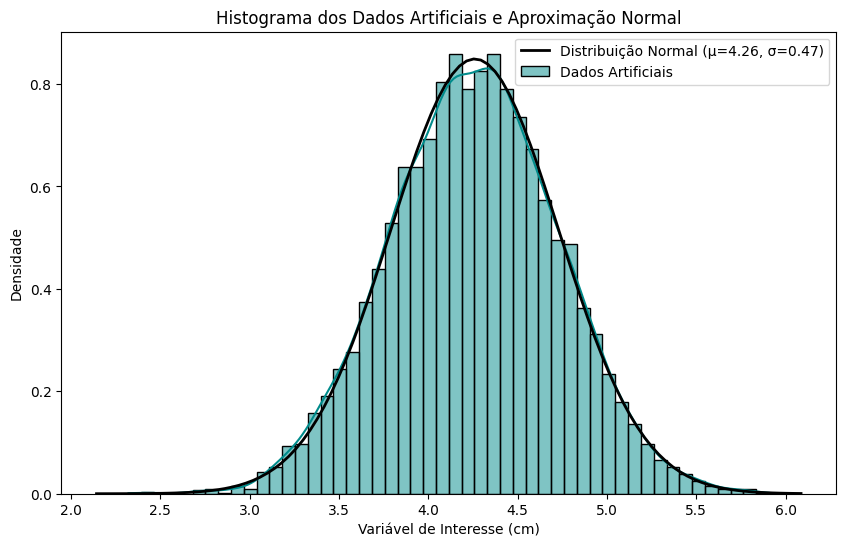

In [20]:
versicolor_petal_length = df[df['species'] == 'Iris-versicolor']['petal_length']

media_amostral = versicolor_petal_length.mean()
desvio_amostral = versicolor_petal_length.std()

N_AMOSTRAS = 10000

dados_artificiais = np.random.normal(loc=media_amostral, scale=desvio_amostral, size=N_AMOSTRAS)

plt.figure(figsize=(10, 6))
sns.histplot(dados_artificiais, bins=50, kde=True, stat="density", color="darkcyan", label="Dados Artificiais")

xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, media_amostral, desvio_amostral)
plt.plot(x, p, 'k', linewidth=2, label=f"Distribuição Normal (μ={media_amostral:.2f}, σ={desvio_amostral:.2f})")

plt.title('Histograma dos Dados Artificiais e Aproximação Normal')
plt.xlabel('Variável de Interesse (cm)')
plt.ylabel('Densidade')
plt.legend()
plt.show()

In [25]:
VALOR_DE_CORTE = 5.0

prob_menor_ou_igual = norm.cdf(VALOR_DE_CORTE, loc=media_amostral, scale=desvio_amostral)
prob_maior_que = 1 - prob_menor_ou_igual

print(f"Probabilidade P(X > {VALOR_DE_CORTE} cm) na versão Não Padronizada: {prob_maior_que:.4f}")

Probabilidade P(X > 5.0 cm) na versão Não Padronizada: 0.0577


In [30]:
Z_score_completo = (VALOR_DE_CORTE - media_amostral) / desvio_amostral
Z_score = round(Z_score_completo, 2)

print(f"O valor X = {VALOR_DE_CORTE} cm corresponde ao Z-score: {Z_score:.2f}")

prob_menor_z = norm.cdf(Z_score, loc=0, scale=1)
prob_maior_z = 1 - prob_menor_z

print(f"Probabilidade P(Z > {Z_score:.2f}) na versão Padronizada (Z-score): {prob_maior_z:.4f}")

O valor X = 5.0 cm corresponde ao Z-score: 1.57
Probabilidade P(Z > 1.57) na versão Padronizada (Z-score): 0.0582


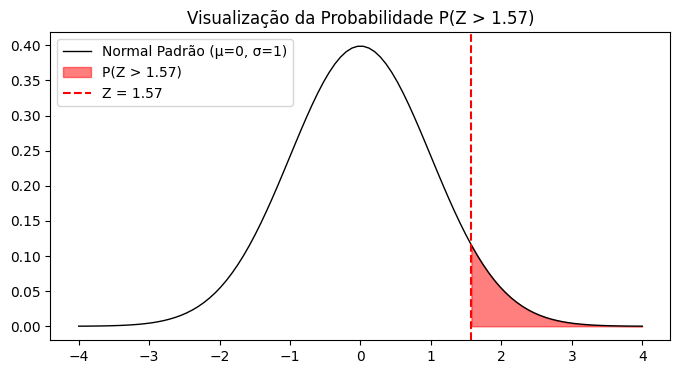

In [24]:

fig, ax = plt.subplots(figsize=(8, 4))
x_norm = np.linspace(-4, 4, 100)
ax.plot(x_norm, norm.pdf(x_norm, 0, 1), 'k-', lw=1, label='Normal Padrão (μ=0, σ=1)')

x_fill = np.linspace(Z_score, 4, 100)
ax.fill_between(x_fill, norm.pdf(x_fill, 0, 1), color='red', alpha=0.5, label=f'P(Z > {Z_score:.2f})')

ax.set_title('Visualização da Probabilidade P(Z > 1.57)')
ax.axvline(Z_score, color='red', linestyle='--', label=f'Z = {Z_score:.2f}')
ax.legend()
plt.show()

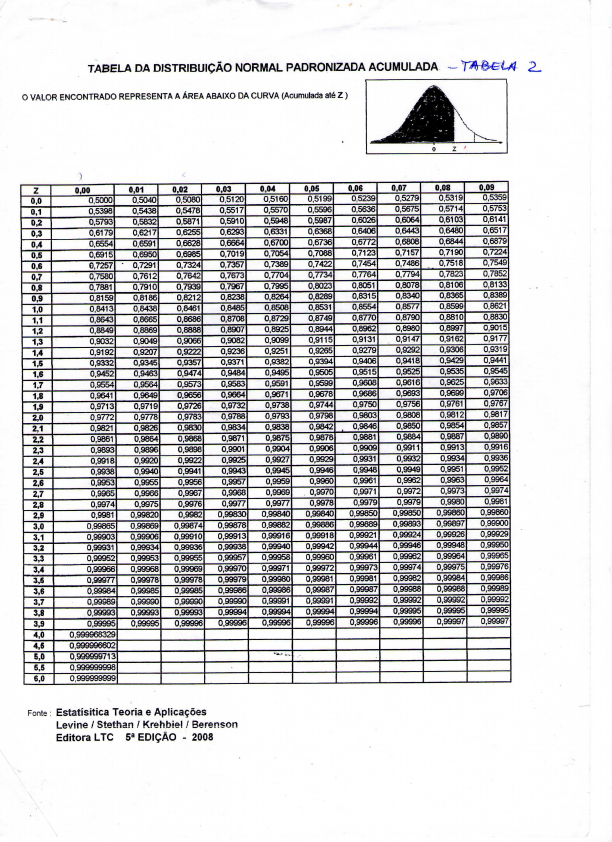